In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
!ls ../ex2

costFunction.m         ex2data2.txt           predict.m
costFunctionReg.m      lib                    sigmoid.m
ex2.m                  mapFeature.m           submit.m
ex2_reg.m              plotData.m
ex2data1.txt           plotDecisionBoundary.m


In [3]:
df = pd.read_csv('../ex2/ex2data1.txt', 
                 header=None, 
                 names=['exam1', 'exam2', 'admitted'])
df['intercept'] = 1
X = df[['intercept', 'exam1', 'exam2']]
y = df.admitted
print(X.shape)
X.head()

(100, 3)


,intercept,exam1,exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


# 1.1 Visualization of the data

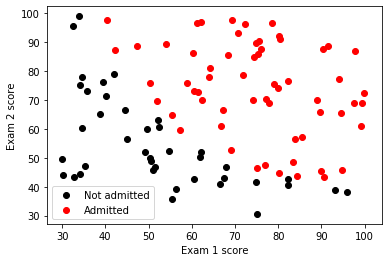

In [4]:
plt.scatter(X.exam1[y == 0], X.exam2[y == 0], c='k', label='Not admitted')
plt.scatter(X.exam1[y == 1], X.exam2[y == 1], c='r', label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend();

In [5]:
X = X.values

# 1.2 Implementation
## 1.2.1 Sigmoid Function

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

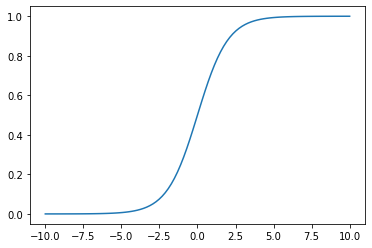

In [7]:
# Test
z = np.linspace(-10, 10, 100)
sig = [sigmoid(x) for x in z]
plt.plot(z, sig);

In [154]:
def inverse_sigmoid(s):
    return - np.log((1 - s) / s)

In [8]:
def predict(theta, X):
    return sigmoid(X @ theta).reshape(-1)

In [89]:
def log_loss(theta, X, y):
    m = X.shape[0]
    preds = predict(theta, X)
    loss = ((-y@np.log2(preds)) - ((1 - y)@np.log2(1-preds))) / m
    return loss

In [129]:
0.001 * 0.96

0.00096

theta: [-7.4234, 0.0656, 0.0585]	loss: 0.457520156
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587]	loss: 0.457495565
theta: [-7.4239, 0.0654, 0.0587

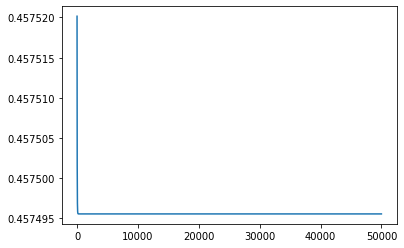

In [135]:
ITERS = 50000
ALPHA = 0.001

#theta = np.random.rand(3).reshape([3, 1]) / 3.
theta = np.array([[-7.4234], [0.0656], [0.0585]])

losses = []
for i in range(ITERS):
    loss = log_loss(theta, X, y)
    losses.append(loss)
    if i % 500 == 0:
        print(f'theta: [{theta[0, 0]:.4f}, {theta[1, 0]:.4f}, '
              f'{theta[2, 0]:.4f}]\tloss: {loss:.9f}')
    grad = get_grad(theta, X, y)
    theta -= (ALPHA * grad)
    ALPHA *= 0.96
    
plt.plot(losses);

In [136]:
def get_grad(theta, X, y):
    m = X.shape[0]
    preds = predict(theta, X)
    grad = ((preds - y) @ X) / m  
    return grad.reshape(theta.shape)

In [137]:
theta

array([[-7.42393214],
       [ 0.06535193],
       [ 0.05872828]])

In [138]:
preds = predict(theta, X)
preds

array([0.35917358, 0.05382145, 0.31006535, 0.82890265, 0.89714115,
       0.23680273, 0.90356307, 0.55307851, 0.93603582, 0.65713597,
       0.7475731 , 0.3264319 , 0.92031591, 0.94521669, 0.40745075,
       0.79284737, 0.54668668, 0.43976361, 0.93409632, 0.59888816,
       0.37631657, 0.90895172, 0.22232503, 0.06967074, 0.84802395,
       0.68002877, 0.61038913, 0.71909351, 0.39370759, 0.25500009,
       0.70332987, 0.81876211, 0.42282232, 0.51374859, 0.3509619 ,
       0.3128152 , 0.64541458, 0.82079596, 0.47632401, 0.31618   ,
       0.79675354, 0.21359342, 0.9307891 , 0.58527477, 0.19832846,
       0.4255312 , 0.85304311, 0.9830269 , 0.91017139, 0.97744525,
       0.89623637, 0.93376943, 0.73918288, 0.16510629, 0.22922764,
       0.33830205, 0.95264277, 0.57917545, 0.82186586, 0.86709895,
       0.92688869, 0.08655189, 0.19125474, 0.07262695, 0.35382327,
       0.34056422, 0.72073714, 0.23686701, 0.96203226, 0.62715118,
       0.06053574, 0.79311877, 0.9505149 , 0.69420474, 0.70609

In [139]:
def pred_absolute(thresh, preds):
    preds = map(lambda x: 1 if x >= thresh else 0, preds)
    return list(preds)

In [140]:
def get_accuracy(y, preds):
    return (y == preds).sum() / len(y)

In [141]:
def optimize_threshold(y, preds):
    best_acc = 0
    accs = []
    best_threshold = 0.5
    thresholds = np.linspace(0.2, 0.8, 100)
    for thresh in thresholds:
        abs_preds = pred_absolute(thresh, preds)
        acc = get_accuracy(y, abs_preds)
        if acc > best_acc:
            best_acc = acc
            best_threshold = thresh
        accs.append(acc)
    plt.plot(thresholds, accs)
    return best_threshold

0.49090909090909096

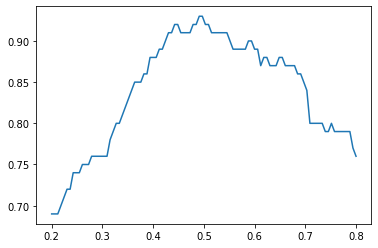

In [142]:
optimize_threshold(y, preds)

In [166]:
def e2_from_e1(e1):
    e2 = (-1. / theta[2][0]) * (theta[1][0] * e1 + theta[0][0])
    return e2

In [167]:
e1s = np.linspace(30, 100, 100)
e2s = [e2_from_e1(e1) for e1 in e1s]

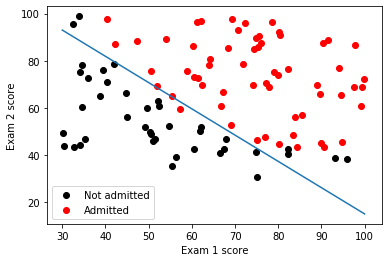

In [168]:
plt.scatter(
    df.exam1[y == 0], df.exam2[y == 0], c='k', label='Not admitted')
plt.scatter(df.exam1[y == 1], df.exam2[y == 1], c='r', label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.plot(e1s, [e for e in e2s])
plt.legend();